<a href="https://colab.research.google.com/github/robitussin/tensorflow_lite_projects/blob/main/models/FruitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


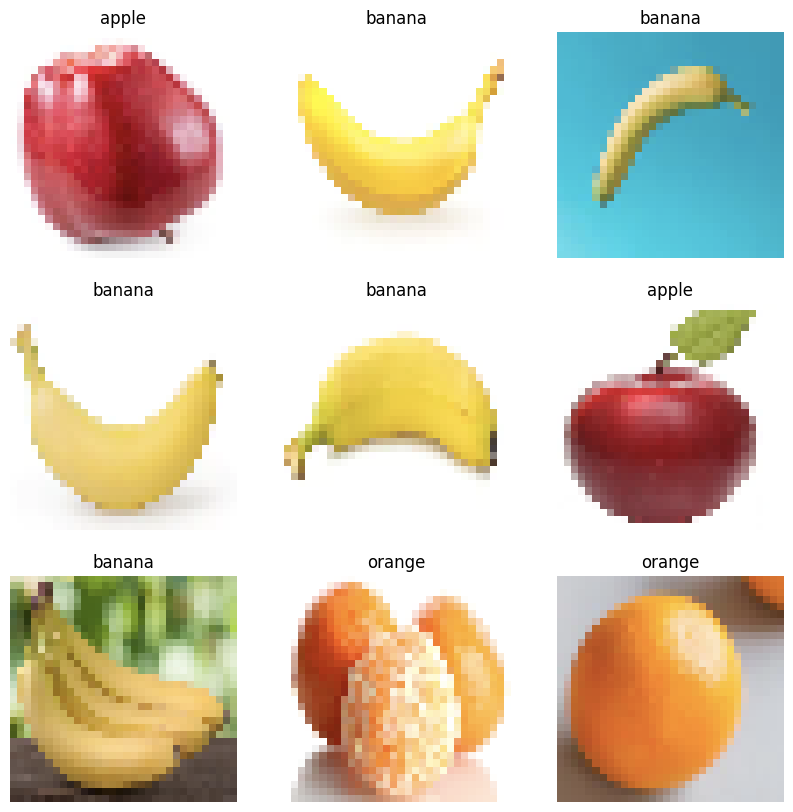

In [5]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [7]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [8]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3580 - loss: 1.0872 - val_accuracy: 0.6970 - val_loss: 0.9666
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6266 - loss: 0.9090 - val_accuracy: 0.7121 - val_loss: 0.6028
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7749 - loss: 0.5261 - val_accuracy: 0.6970 - val_loss: 0.5242
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8458 - loss: 0.3930 - val_accuracy: 0.9242 - val_loss: 0.2308
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8915 - loss: 0.2916 - val_accuracy: 0.9394 - val_loss: 0.1820
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8617 - loss: 0.3095 - val_accuracy: 0.8485 - val_loss: 0.3708
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9170 - loss: 0.2658 - val_accuracy: 0.9242 - val_loss: 0.1927
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9521 - loss: 0.1770 - val_accuracy: 0.8788 - v

In [9]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9469 - loss: 0.1566


[0.1986617147922516, 0.9384615421295166]

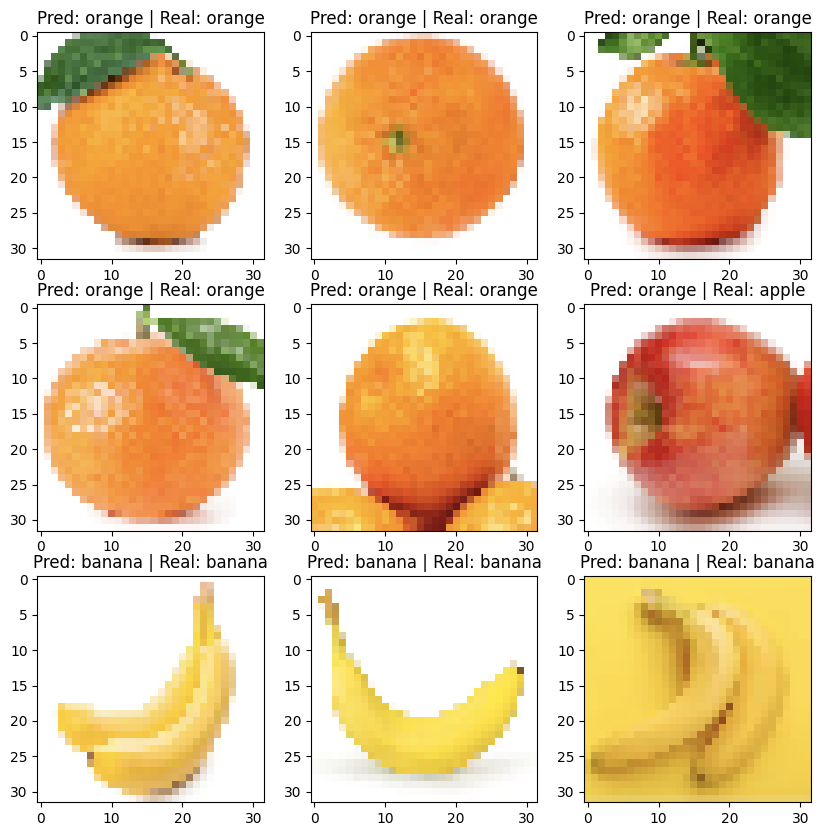

In [10]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Vernon\AppData\Local\Temp\tmpwl5yy55h\assets


INFO:tensorflow:Assets written to: C:\Users\Vernon\AppData\Local\Temp\tmpwl5yy55h\assets


Saved artifact at 'C:\Users\Vernon\AppData\Local\Temp\tmpwl5yy55h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2494682342480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682343632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682343824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682344784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682344400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682345552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682345936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682346896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682347280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494682348240: TensorSpec(shape=(), dtype=tf.resource, name=None)
